## solve_ODEs_CA3.py

Author: Matthew Brooks

Date: 10/03/2018

This function solves a system differential equations that
plots the molar flow rates of species A, B, and C and the temperature
along the volume of a non-isothermal plug-flow reactor. The paramters
used for this model are listed below and can be changed to fit different
situations.

The list of paramters used in this calculation are:


$H_{r1}$ - J/(mol of A reacted in reaction 1)

$H_{r2}$ - J/(mol of A reacted in reaction 2)

$C_{pa}$ - J/mol*C

$C_{pb}$ - J/mol*C

$C_{pc}$ - J/mol*C

$C_{t0}$ - J/mol*C

$U_a$ - J/$\textrm{m}^3$*s*C

$T_a$ - K

$T_0$ - K

$\frac{E_1}{R}$ - K

$\frac{E_2}{R}$ - K

$F_a$ - mol/s

$F_b$ - mol/s

$F_c$ - mol/s

$T$ - k

The system of differential equations used are:

$\frac{dF_A}{dV} = r_A$

$\frac{dF_B}{dV} = r_B$

$\frac{dF_C}{dV} = r_C$

$\frac{dT}{dV} = \frac{U_a(T_a-T)+(k_{1A}C_A)(- \Delta H_{Rx1A})+(k_{2A}C_A^2)(- \Delta H_{Rx2A})}{F_AC_{P_A}+F_BC_{P_B}+F_CC_{P_C}}$

Importing necessary functions.

In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Creating the function that describes the system of differential equations that govern the model using the span of V and the initial values of the parameters of interest.

In [12]:
def ODEs_CA3(init, V):
    

    #listing parameters of interest and their initial values
    F_a = init[0]
    F_b = init[1]
    F_c = init[2]
    T = init[3]
    
    #creating the system of differential equations to be solved
    k_1a = 10*np.exp(E1overR*((1/300)-(1/T)))
    k_2a = 0.09*np.exp(E2overR*((1/300)-(1/T)))
    
    F_t = F_a+F_b+F_c
    
    C_a = C_t0*(F_a/F_t)*(T_0/T)
    C_b = C_t0*(F_b/F_t)*(T_0/T)
    C_c = C_t0*(F_c/F_t)*(T_0/T)
    
    r_a = -k_1a*C_a-k_2a*C_a**2
    r_b = k_1a*C_a
    r_c = (1/2)*k_2a*C_a**2
    
    dF_a_dV = r_a
    dF_b_dV = r_b
    dF_c_dV = r_c
    dT_dV = ((U_a*(T_a-T))+((k_1a*C_a)*(-H_r1))+((k_2a*C_a**2)*(-H_r2)))/((F_a*C_pa)+(F_b*C_pb)+(F_c*C_pc))
    
    #return function results for the system equations
    return dF_a_dV, dF_b_dV, dF_c_dV, dT_dV

Creating model resolution and boundary. The span of the volume goes from 0 to 1 and is calculated in intervals of 0.01.

In [13]:
V = np.linspace(0, 1, num=101)

System parameters that the model will use. These can be changed to reflect another model.

In [14]:
H_r1 = -20000
H_r2 = -60000
C_pa = 90
C_pb = 90
C_pc = 180
U_a = 4000
T_a = 373
E1overR = 4000
E2overR = 9000
C_t0 = .1
T_0 = 423

Initial conditions that the ode solver will be given as a starting point to solve the function.

In [15]:
F_ai = 100
F_bi = 0
F_ci = 0
Ti = 423
init = [F_ai, F_bi, F_ci, Ti]

Calling ode solver using the function name, the initial values for the parameters and the span of V.

In [16]:
dt = odeint(ODEs_CA3, init, V)

Plot results.

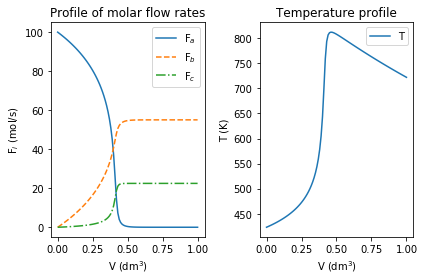

In [27]:
#plot flow rate of species A,B,C along the volume of the reactor
plt.subplot(1,2,1)
plt.plot(V, dt[:,0], '-', label='F$_a$')
plt.plot(V, dt[:,1], '--', label='F$_b$')
plt.plot(V, dt[:,2], '-.', label='F$_c$')
plt.legend()
plt.title('Profile of molar flow rates')
plt.xlabel('V (dm$^3$)')
plt.ylabel('F$_i$ (mol/s)')

#plot temperature profile along the volume of the reactor
plt.subplot(1,2,2)
plt.plot(V, dt[:,3], label='T')
plt.legend()
plt.title('Temperature profile')
plt.xlabel('V (dm$^3$)')
plt.ylabel('T (K)')

plt.tight_layout()
plt.show()

Fig 1. Profile of molar flow rates: Illustrates the changing molar flow rates of species A, B, and C along the volume of the reactor.

Fig 2. Temperature profile: Illustrates the changing temperature along the volume of the reactor.